In [1]:
# Import math functions from NumPy
from numpy import *
# Import plotting functions from helper
from helper import plot_asset_path, plot_probability, plot_binomial_tree

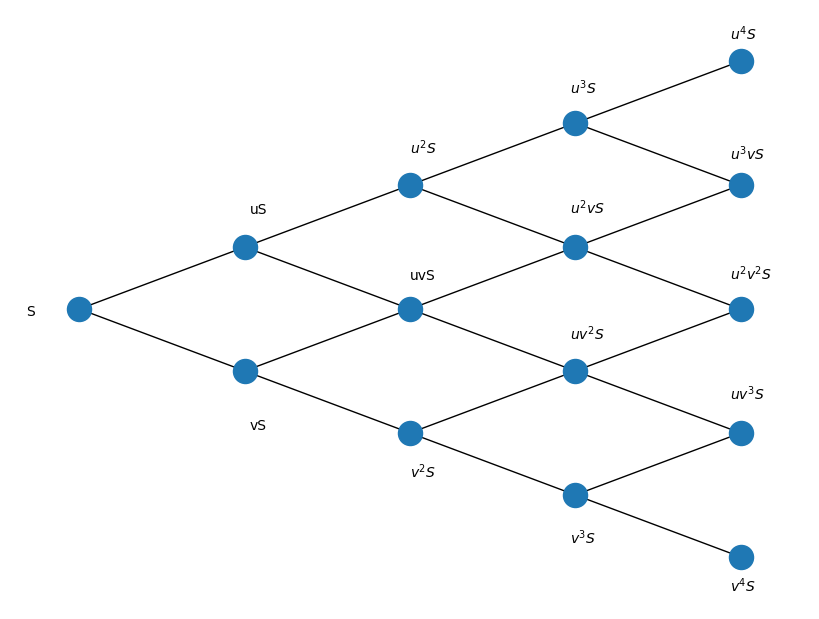

In [2]:
# Plot asset price path
plot_asset_path()

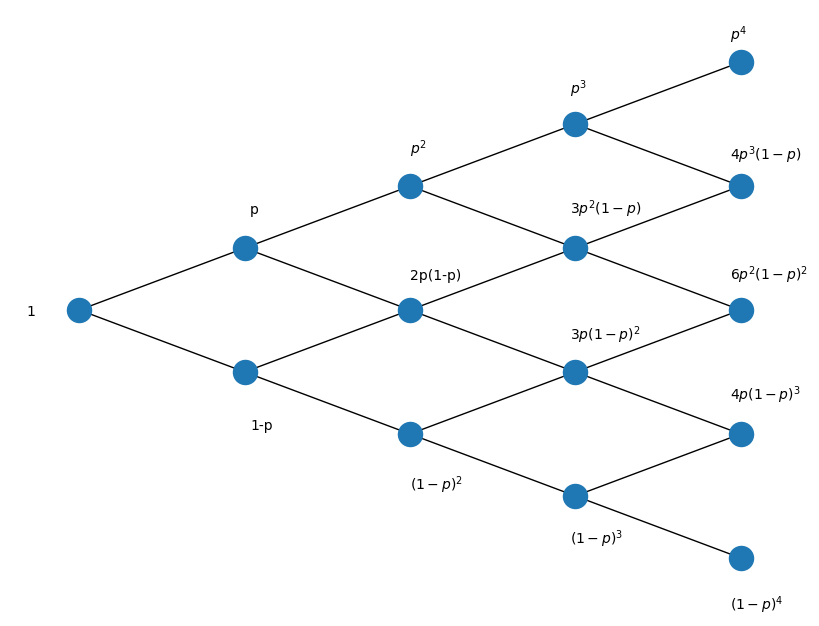

In [3]:
# Plot node probability
plot_probability()

In [17]:
# Create a user defined function
def binomial_option(spot: float, strike: float, rate: float, sigma: float, time:float, steps: int, output: int=0) -> ndarray:
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff

    Params
    ------
    spot int or float - spot price
    strike int or float - strike price
    rate float - interest rate
    sigma float - volatility
    time int or float - expiration time
    steps int - number of trees
    output int - [0: price, 1: payoff, 2: option value, 3:option delta]

    Returns
    -------
    out: ndarray
    An array object of price, payoff, option value and delta specified by the output parameter
    """

    # params
    ts = time/steps
    u = 1+sigma*sqrt(ts)
    v = 1- sigma*sqrt(ts)
    p = 0.5+rate*sqrt(ts)/(2*sigma)
    df = 1/(1+rate*ts)
    print(ts,u,v,p,df)
    # initialize arrays
    px = zeros((steps+1, steps+1))
    cp = zeros((steps+1, steps+1))
    V = zeros((steps+1, steps+1))
    d = zeros((steps+1, steps+1))

    # binomial loop

    # forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot*power(v,i)*power(u,j-i)
            cp[i,j] = maximum(px[i,j]-strike, 0)

    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    results = around(px,2), around(cp,2), around(V,2), around(d,4)
    return results[output]

In [18]:
 # Asset price
px = binomial_option(100,100,0.05,0.2,1,4,0)
px

0.25 1.1 0.9 0.5625 0.9876543209876544


array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [16]:
 # Intrinsic value of call options
cp = binomial_option(100,100,0.05,0.2,1,4,1)
cp

0.25 1.1 0.9 0.5625 0.9876543209876544
0 0
0 1
1 1
0 2
1 2
2 2
0 3
1 3
2 3
3 3
0 4
1 4
2 4
3 4
4 4


array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [9]:
# Option price
opx = binomial_option(100,100,0.05,0.2,1,4,2)
opx

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])